# Проект - Принятие решений в бизнесе

Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. 

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


## Задача
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd #импортируем все необходимые библиотеки
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 300

In [2]:
try: # откроем файл
    data = pd.read_csv('/Users/evgeniyakoreshilova/Desktop/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.columns = data.columns.str.lower() #приведем названия колонок к нижнему регистру

ICE и RICE
ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации гипотез. Расчитывается так:

ICE = Impact * Confidence / Efforts


Применим фреймворк ICE для приоритизации гипотез

In [4]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективными гипотезами по ICE являются - 8, 0, 7 и 6. Теперь применим фреймворк RICE. RICE - это модификация метода ICE (R от англ. reach, «охват»). Расчитывается по формуле: RICE = Reach * Impact * Confidence / Efforts

In [5]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Только гипотеза 6 осталась на своем месте. Гипотезы 7 и 0 поменяли свои места, но остались перспективными. Гипотеза 8 с первого места спустилась на пятое, поменявшись с гипотезой 2.



## Вывод

Согласно полученным результатам наиболее приоритетными гипотезами являются - 7 и 0. Также перспективной является гипотеза 2, так как вносимые изменения затронут большое число пользователей. Показатель reach (скольких пользователей затронет изменение), применяемый в фреймворке RICE, сильно влияет на место гипотезы среди остальных. Следовательно, его необходимо учитывать при определении иерархии перспективных гипотез.

# Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

## Задача - Проанализируйте A/B-тест

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [6]:
try: # откроем файл
    orders = pd.read_csv('/Users/evgeniyakoreshilova/Desktop/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d') #изменим тип данных в столбце date на datetime
)
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.duplicated().sum() #Поищем явные дубликаты

0

In [8]:
try:
    visitors = pd.read_csv('/Users/evgeniyakoreshilova/Desktop/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
visitors.duplicated().sum()

0

In [10]:
ordersA = orders.query('group == "A"')
ordersA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  557 non-null    int64         
 1   visitorId      557 non-null    int64         
 2   date           557 non-null    datetime64[ns]
 3   revenue        557 non-null    int64         
 4   group          557 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 26.1+ KB


In [11]:
visitorsA = visitors.query('group == "A"')
visitorsA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      31 non-null     datetime64[ns]
 1   group     31 non-null     object        
 2   visitors  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 992.0+ bytes


Анализ распределение по группам А и В показывает, что пользователи распределены неравномерно. В группе В на 83 пользователя больше чем в группе А, разница больше 1%, следовательно к результатам теста будем относится осторожно.

Проверим, есть ли пользователи, попавшие в обе группы.

In [12]:
orders_group = orders.groupby('visitorId').nunique().query('group == 2').reset_index()
orders_group_list = orders_group['visitorId']

58 пользователей есть в обеих группах. Их безболезненно можно удалить

In [13]:
orders = orders.query('visitorId not in @orders_group_list') #удалим этих пользователей

Чтобы построить графики, нужно собрать кумулятивные данные. 
Объявим датафрейм cumulativeData со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.


Создадим массив уникальных пар значений дат и групп теста, удалим дубликаты

In [14]:
datesGroups = orders[['date','group']].drop_duplicates()

Агрегируем значения

In [15]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : 'nunique',
        'visitorId' : 'nunique',
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях

In [16]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

Объединим кумулятивные данные в одной таблице и переименуем столбцы

In [17]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики кумулятивной выручки по группам A/B-тестирования: 

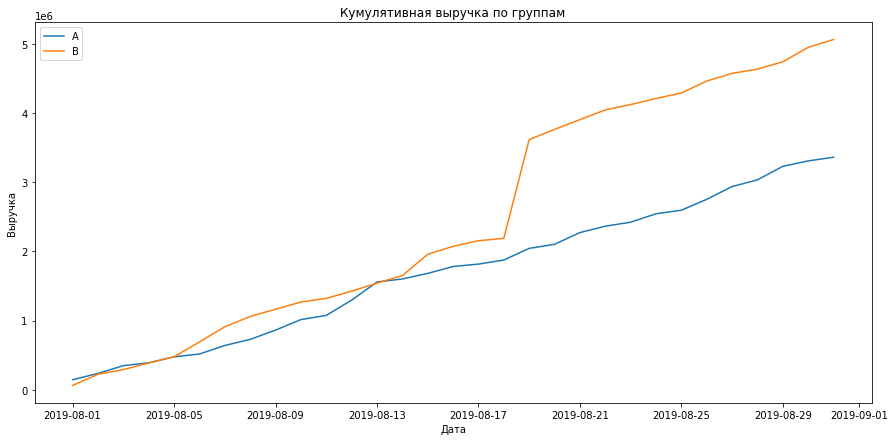

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']] #группа А
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] #группа В
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')# график выручки группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')# график выручки группы B
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

**Вывод:**
Выручка почти равномерно увеличивается в течение всего теста.
Однако график выручки группы В в одной точке резко растет. Это может сигнализировать о большом числе заказов, либо о появлении дорогих заказов в выборке.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

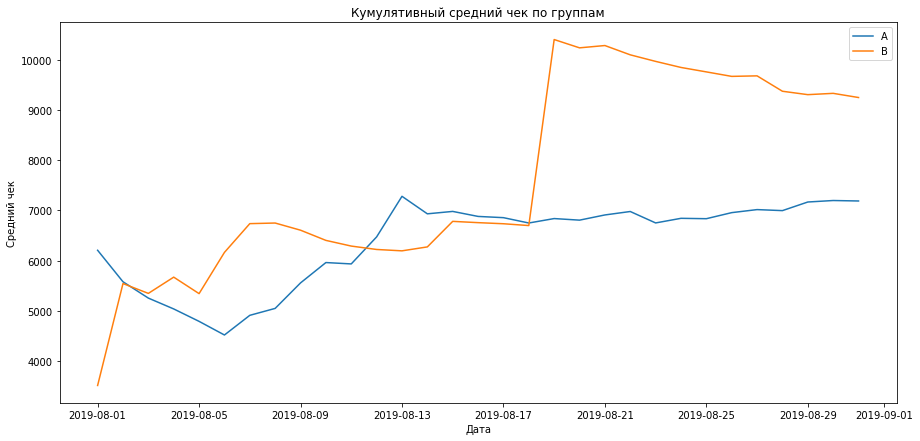

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 
plt.show()

**Вывод:**
Кумулятивное значение среднего чека в обеих группах сильно колеблется. Только ближе к концу он становится равномерным. Возможно, в группах попали крупные заказы (резкие всплески на графике). Показатели группы В превосходят показатели группы А

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия для среднего чека.
Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB'].

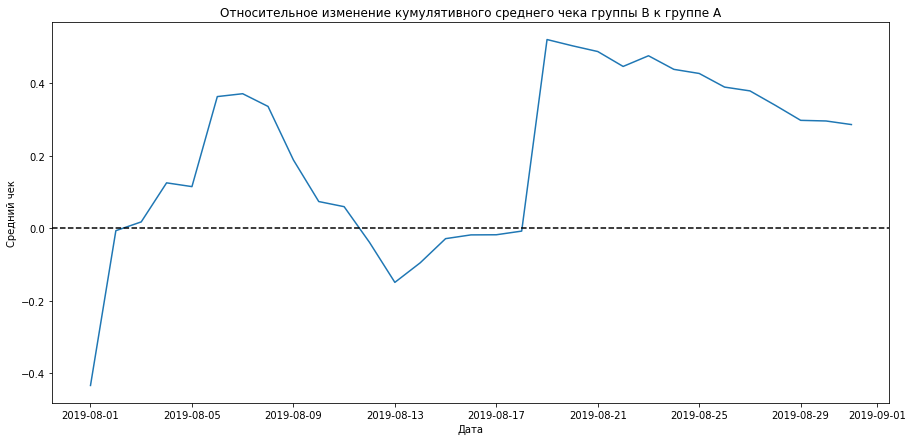

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,\
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 7))

plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

**Вывод:** в нескольких точках график различия между сегментами резко «скачет». Наверное, это влияние крупных заказов и выбросов.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

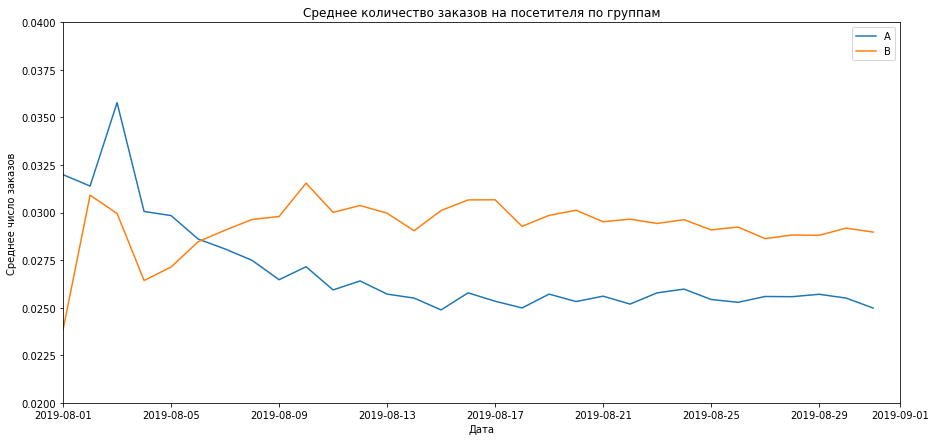

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.04])
plt.show()

**Вывод:** в начале группа А имела более высокий уровень конверсии, затем группа В вырвалась вперед. В обеих группа во второй половине теста колебания несильные, в начале - есть резкие скачки.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

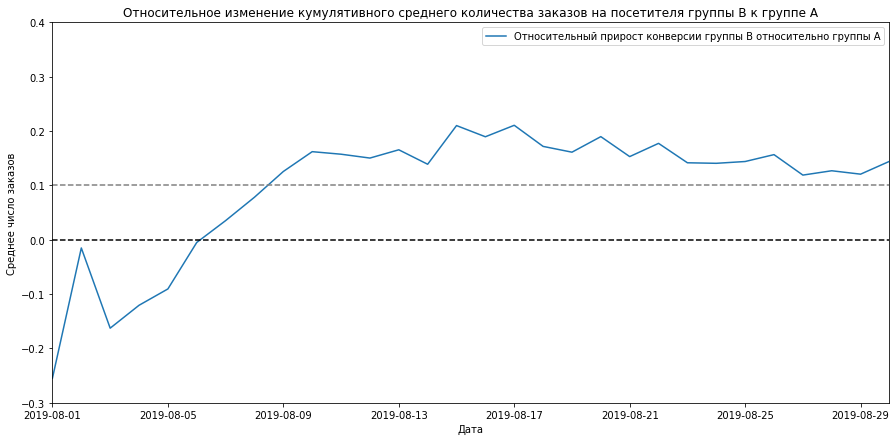

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 30), -0.3, 0.4])
plt.show()

**Вывод:** В начале теста группа B проигрывала группе A. Потом её конверсия постепенно рoсла и остановилась около отметки в 10% относительно группы А.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Сперва нужно проанализировать имеющиеся аномалии.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [23]:
#Найдем число заказов по пользователям. 
ordersByVisitors = (
    orders[['visitorId', 'transactionId']]
    .groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
)

In [24]:
ordersByVisitors.columns = ['visitorId','orders']

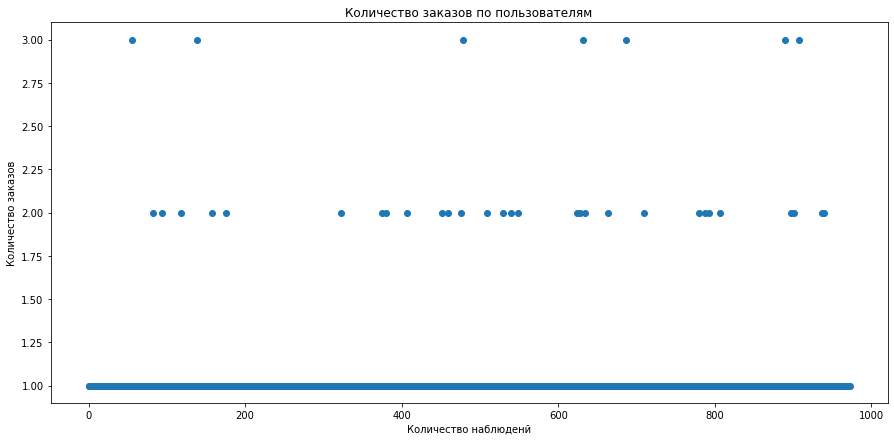

In [25]:
plt.figure(figsize=(15,7))
x_values = pd.Series(range(0, len(ordersByVisitors)))
plt.scatter(x_values, ordersByVisitors['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество наблюденй')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:** пользователей, сделавших 2 и 3 заказа, совсем мало. Они могут быть аномальными.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
np.percentile(ordersByVisitors['orders'], [95, 99])

array([1., 2.])

**Вывод:** всего 1% пользователей, сделавших 2 заказа и более, их будем считать аномальными

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

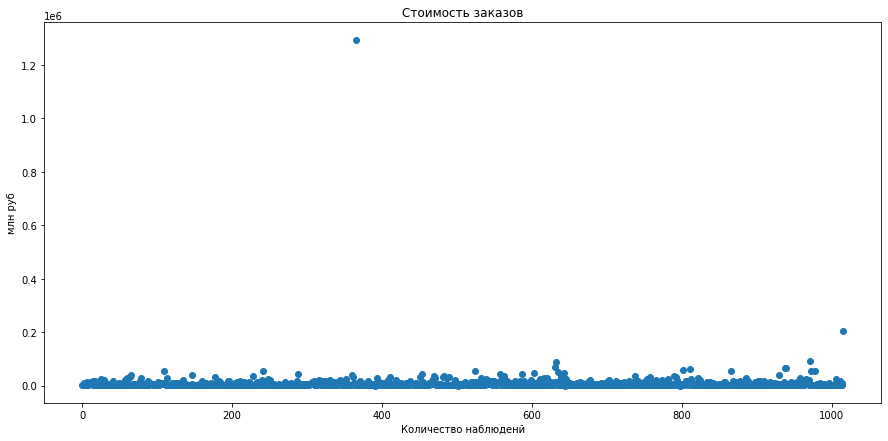

In [27]:
plt.figure(figsize=(15,7))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Количество наблюденй')
plt.ylabel('млн руб')
plt.show()

**Вывод:** всего два аномально дорогих заказа. Большинство - не превышает отметку в 100 тыс рублей.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:** 1% заказов дороже 53904 рублей, 5% заказов дороже 26785 рублей. Установим границу для аномальных данных > 30 тыс рублей, все, что меньше, возьмем в выборку.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы: 
- Н0: Нет различий в среднем количестве заказов между группами А и В, 
- Н1: Есть различия в среднем количестве заказов между группами А и В.

In [29]:
# посетили по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кумулятивные данные по посетителям в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
# переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# аналогичные операции с посетителями в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [30]:
# заказы по дням в группе А 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кумулятивные данные по заказам по дням в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# аналогично для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# соединяем все данные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [31]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [33]:
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                  .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                  .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [34]:
pvalue = "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]) #p-value
if pvalue < '0.05':
    print("Нулевую гипотезу можно отвергнуть:", 'p-value', pvalue)
else:
    print("Нулевая гипотеза верна", 'p-value', pvalue)

Нулевую гипотезу можно отвергнуть: p-value 0.011


**Вывод:** p-value меньше 0.05. По "сырым" данным нулевую гипотезу можно отвергнуть, между группами есть статистически значимые отличия по количеству заказов.

Посчитаем разницу между группами

In [35]:
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'0.160'

Разница между группами А и В по среднему числу заказов - 16%. Показатели группы В выше.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

 - Н0: Нет различий в среднем чеке заказа между группами А и В,
 - Н1: Есть различия в среднем чеке заказа между группами А и В.

In [36]:
pvalue = '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue']\
                                    , orders[orders['group']=='B']['revenue'])[1])
if pvalue < '0.05':
    print("Нулевую гипотезу можно отвергнуть:", 'p-value', pvalue)
else:
    print("Нулевая гипотеза верна:", 'p-value', pvalue)

Нулевая гипотеза верна: p-value 0.829


In [37]:
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.287'

**Вывод:** по неочищенным данным P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое различие между группами в 28.7% не является статистически значимым.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы: 
- Н0: Нет различий в среднем количестве заказов между группами А и В по очищенным данным, 
- Н1: Есть различия в среднем количестве заказов между группами А и В по очищенным данным.

Сделаем срезы пользователей с числом заказов больше либо равно 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [38]:
orders_lim = 1
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['userId'],
    ],
    axis=0,
)
revenue_lim = 30000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']

In [39]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
abnormalUsers.shape[0] #сколько всего аномальных пользователей

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
dtype: int64


77

Всего 77 аномальных пользователей

Объявим переменные sampleAFiltered и sampleBFiltered, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [41]:
pvalue = '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
if pvalue < '0.05':
    print("Нулевую гипотезу можно отвергнуть:", 'p-value', pvalue)
else:
    print("Нулевая гипотеза верна:", 'p-value', pvalue)

Нулевую гипотезу можно отвергнуть: p-value 0.013


In [42]:
# проверим различия между группами
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.180'

**Вывод:** p-value меньше 0.05 - нулевую гипотезу можно отвергнуть. Между группами в среднем количестве заказов на посетителя есть статистически значимые различия. Группа В превосходит группу А на 18%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

 - Н0: Нет различий в среднем чеке заказа между группами А и В по очищенным данным,
 - Н1: Есть различия в среднем чеке заказа между группами А и В по очищенным данным.

In [43]:
pvalue = '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
if pvalue < '0.05':
    print("Нулевую гипотезу можно отвергнуть:", 'p-value', pvalue)
else:
    print("Нулевая гипотеза верна:", 'p-value', pvalue)

Нулевая гипотеза верна: p-value 0.829


In [44]:
# прирост среднего чека группы В относительно группы А по очищенным данным
"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'-0.011'

**Вывод:** В группе В показатель среднего чека на 1% ниже чем в группе А. Статистически значимых различий по "очищенным" данным в среднем чеке между группами нет, нулевую гипотезу не отвергаем. 

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Решение - остановить тест, зафиксировать преимущество группы В

1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Так же при сравнении групп - по сырым данным разница между ними 16%, по очищенным - 18%, что свидетельствует о преимуществе показателей группы В над группой А.
2. Нет статистически значимого различия по среднему чеку между группами как по сырым, так и по очищенным данным.
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы А, в конце наблюдается стабилизация.
4. График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.